<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading the data into a pandas dataframe
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [3]:
# printing the first five rows
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# printing the last five rows
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# getting some basic info about the dataset
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking for empty values in columns
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
# statistical analysis
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# number of rows and columns
credit_card_data.shape

(284807, 31)

In [9]:
# distribution of legit and fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


**This dataset is highly unbalanced**

**0 --> Normal Transaction**

**1--> Fraudulent Transaction**

In [10]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [11]:
print(legit.shape, fraud.shape)

(284315, 31) (492, 31)


In [12]:
#statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [13]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [14]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Undersampling**

**Build a sample dataset containing similar distribution of legit and fraudulent transaction**

**Number of Fraudulent Transactions = 492**

In [15]:
legit_sample = legit.sample(n = 492)

**Concatenating two DataFrames**

In [16]:
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [17]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
268474,163229.0,2.056941,0.115745,-1.703518,0.434246,0.369519,-0.902841,0.180290,-0.226781,0.528093,...,-0.360418,-0.963085,0.339668,0.561755,-0.273752,0.169598,-0.065790,-0.029244,9.84,0
183656,125896.0,1.941576,-0.032807,-0.610152,1.646305,-0.097767,-0.350460,0.052045,-0.166319,0.934865,...,-0.316661,-0.450065,0.224125,-0.012676,0.083353,-0.820505,0.049741,-0.040756,10.00,0
119047,75313.0,-3.980519,-0.968772,1.078344,-3.206674,0.019625,0.676450,-2.316703,-4.731281,1.894952,...,-2.849819,1.140429,1.263598,-0.333377,0.926879,-0.985733,0.492934,0.583463,58.45,0
282507,170946.0,-0.087823,1.168998,-0.628601,-0.799653,1.107645,-0.328931,0.855487,0.064348,-0.108815,...,-0.342424,-0.800340,0.044806,0.175717,-0.349856,0.120807,0.324012,0.131753,0.89,0
85817,60952.0,-1.364339,1.086650,0.250977,1.720175,1.984803,-1.145017,-6.461673,-7.957005,-0.678859,...,-3.627628,0.867157,-5.219082,0.676004,-1.131839,-0.414835,0.455349,0.524971,108.45,0


In [18]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [19]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [20]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93540.264228,0.024979,-0.132777,0.046693,-0.014305,0.002806,-0.039528,-0.044679,0.018810,-0.090118,...,0.027370,-0.009096,-0.028804,-0.011812,0.021382,-0.012530,-0.002819,-0.022005,-0.026330,92.163821
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Splitting the data into Features & Target**

In [21]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [22]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
268474  163229.0  2.056941  0.115745 -1.703518  0.434246  0.369519 -0.902841   
183656  125896.0  1.941576 -0.032807 -0.610152  1.646305 -0.097767 -0.350460   
119047   75313.0 -3.980519 -0.968772  1.078344 -3.206674  0.019625  0.676450   
282507  170946.0 -0.087823  1.168998 -0.628601 -0.799653  1.107645 -0.328931   
85817    60952.0 -1.364339  1.086650  0.250977  1.720175  1.984803 -1.145017   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [23]:
print(Y)

268474    0
183656    0
119047    0
282507    0
85817     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


**Splitting the data into testing and training data**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


**Model Training : Logistic Regression**

In [46]:
model = LogisticRegression()

In [27]:
# training the model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model Evaluation : Accuracy Score**

In [28]:
# accuracy on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  0.9491740787801779


In [30]:
# accuracy on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on test data :  0.9289340101522843


**Making a Predictive System**

In [32]:
input_data = (70536,-2.27175453696818,-0.457654560738072,-2.58905463865543,2.23077826688105,-4.27898250263823,0.388610079538804,0.102485457456358,0.813127838070308,-1.0929208385062,-5.03202838566819,3.51034756034463,-2.22739840581069,0.656823927974733,-5.19918574342056,-0.128311029598493,-3.94352099869908,-3.82052232662867,-0.570821093891663,2.78338340771804,2.28575790271371,1.09634200952947,0.658398654570846,1.71167573455248,0.333540036403021,0.538591373646869,-0.193528512332835,0.258194100840055,0.247269213953463,824.83)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The transaction is legit')
else:
  print('The transaction is fraudulent')

[1]
The transaction is fraudulent


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

# Initialize and train the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)
rf_model.fit(X_train, Y_train)

# Accuracy on the training data for Random Forest
X_train_prediction_rf = rf_model.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, Y_train)

print("Accuracy on training data (Random Forest): ", training_data_accuracy_rf)

# Accuracy on the test data for Random Forest
X_test_prediction_rf = rf_model.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction_rf, Y_test)

print("Accuracy on test data (Random Forest): ", test_data_accuracy_rf)

# Initialize and train the LightGBM model
lgbm_model = lgb.LGBMClassifier(random_state=2)
lgbm_model.fit(X_train, Y_train)

# Accuracy on the training data for LightGBM
X_train_prediction_lgbm = lgbm_model.predict(X_train)
training_data_accuracy_lgbm = accuracy_score(X_train_prediction_lgbm, Y_train)

print("Accuracy on training data (LightGBM): ", training_data_accuracy_lgbm)

# Accuracy on the test data for LightGBM
X_test_prediction_lgbm = lgbm_model.predict(X_test)
test_data_accuracy_lgbm = accuracy_score(X_test_prediction_lgbm, Y_test)

print("Accuracy on test data (LightGBM): ", test_data_accuracy_lgbm)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=2)
xgb_model.fit(X_train, Y_train)

# Accuracy on the training data for XGBoost
X_train_prediction_xgb = xgb_model.predict(X_train)
training_data_accuracy_xgb = accuracy_score(X_train_prediction_xgb, Y_train)

print("Accuracy on training data (XGBoost): ", training_data_accuracy_xgb)

# Accuracy on the test data for XGBoost
X_test_prediction_xgb = xgb_model.predict(X_test)
test_data_accuracy_xgb = accuracy_score(X_test_prediction_xgb, Y_test)

print("Accuracy on test data (XGBoost): ", test_data_accuracy_xgb)

Accuracy on training data (Random Forest):  1.0
Accuracy on test data (Random Forest):  0.9086294416243654
[LightGBM] [Info] Number of positive: 394, number of negative: 393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 787, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500635 -> initscore=0.002541
[LightGBM] [Info] Start training from score 0.002541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

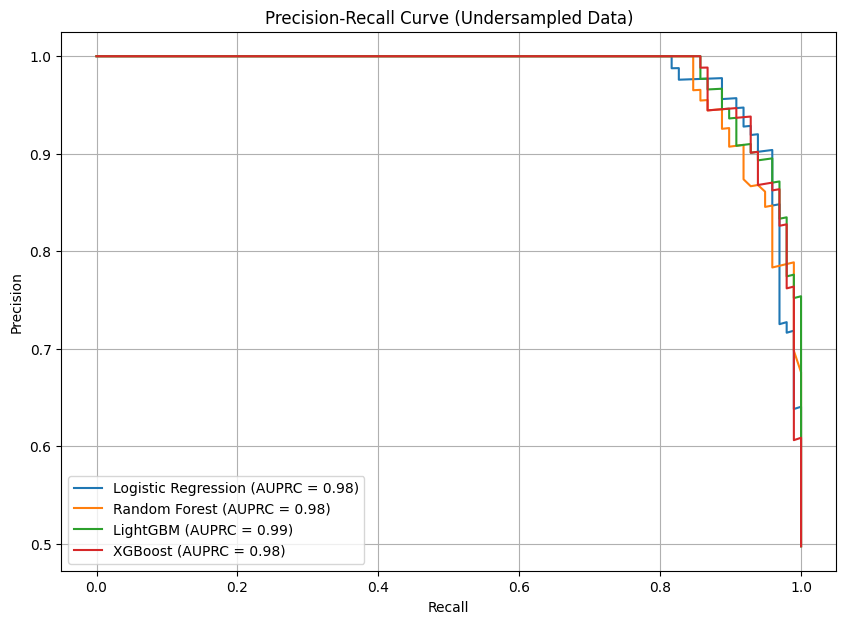

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Function to plot AUPRC
def plot_auprc(model, X_test, Y_test, model_name):
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(Y_test, y_scores)
    auprc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUPRC = {auprc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Undersampled Data)')
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(10, 7))

# Plot AUPRC for each model
plot_auprc(model, X_test, Y_test, 'Logistic Regression')
plot_auprc(rf_model, X_test, Y_test, 'Random Forest')
plot_auprc(lgbm_model, X_test, Y_test, 'LightGBM')
plot_auprc(xgb_model, X_test, Y_test, 'XGBoost')


plt.show()

## Without Undersampling


Splitting the original data into Features & Target

In [37]:
X_original = credit_card_data.drop(columns='Class', axis=1)
Y_original = credit_card_data['Class']

Splitting the original data into training and testing data (maintaining original class distribution)

In [38]:
X_train_orig, X_test_orig, Y_train_orig, Y_test_orig = train_test_split(X_original, Y_original, test_size=0.2, stratify=Y_original, random_state=2)

In [39]:
print(X_original.shape, X_train_orig.shape, X_test_orig.shape)

(284807, 30) (227845, 30) (56962, 30)


Model Training and Evaluation on Original Data (with class_weight='balanced')

In [40]:
# Initialize and train Logistic Regression model with class_weight='balanced'
model_orig_lr = LogisticRegression(class_weight='balanced', random_state=2)
model_orig_lr.fit(X_train_orig, Y_train_orig)

# Accuracy on the training data for Logistic Regression
X_train_prediction_lr_orig = model_orig_lr.predict(X_train_orig)
training_data_accuracy_lr_orig = accuracy_score(X_train_prediction_lr_orig, Y_train_orig)

print("Accuracy on training data (Logistic Regression - Original Data): ", training_data_accuracy_lr_orig)

# Accuracy on the test data for Logistic Regression
X_test_prediction_lr_orig = model_orig_lr.predict(X_test_orig)
test_data_accuracy_lr_orig = accuracy_score(X_test_prediction_lr_orig, Y_test_orig)

print("Accuracy on test data (Logistic Regression - Original Data): ", test_data_accuracy_lr_orig)

# Initialize and train RandomForestClassifier model with class_weight='balanced'
rf_model_orig = RandomForestClassifier(n_estimators=100, random_state=2, class_weight='balanced')
rf_model_orig.fit(X_train_orig, Y_train_orig)

# Accuracy on the training data for Random Forest
X_train_prediction_rf_orig = rf_model_orig.predict(X_train_orig)
training_data_accuracy_rf_orig = accuracy_score(X_train_prediction_rf_orig, Y_train_orig)

print("Accuracy on training data (Random Forest - Original Data): ", training_data_accuracy_rf_orig)

# Accuracy on the test data for Random Forest
X_test_prediction_rf_orig = rf_model_orig.predict(X_test_orig)
test_data_accuracy_rf_orig = accuracy_score(X_test_prediction_rf_orig, Y_test_orig)

print("Accuracy on test data (Random Forest - Original Data): ", test_data_accuracy_rf_orig)

# Initialize and train LightGBM model (LGBMClassifier has class_weight parameter)
lgbm_model_orig = lgb.LGBMClassifier(random_state=2, class_weight='balanced')
lgbm_model_orig.fit(X_train_orig, Y_train_orig)

# Accuracy on the training data for LightGBM
X_train_prediction_lgbm_orig = lgbm_model_orig.predict(X_train_orig)
training_data_accuracy_lgbm_orig = accuracy_score(X_train_prediction_lgbm_orig, Y_train_orig)

print("Accuracy on training data (LightGBM - Original Data): ", training_data_accuracy_lgbm_orig)

# Accuracy on the test data for LightGBM
X_test_prediction_lgbm_orig = lgbm_model_orig.predict(X_test_orig)
test_data_accuracy_lgbm_orig = accuracy_score(X_test_prediction_lgbm_orig, Y_test_orig)

print("Accuracy on test data (LightGBM - Original Data): ", test_data_accuracy_lgbm_orig)

# Initialize and train XGBoost model (XGBClassifier does not have a direct class_weight parameter like others,
# but you can use scale_pos_weight which is equivalent for binary classification)
# Calculate scale_pos_weight
scale_pos_weight_value = len(Y_train_orig[Y_train_orig == 0]) / len(Y_train_orig[Y_train_orig == 1])

xgb_model_orig = xgb.XGBClassifier(random_state=2, scale_pos_weight=scale_pos_weight_value)
xgb_model_orig.fit(X_train_orig, Y_train_orig)

# Accuracy on the training data for XGBoost
X_train_prediction_xgb_orig = xgb_model_orig.predict(X_train_orig)
training_data_accuracy_xgb_orig = accuracy_score(X_train_prediction_xgb_orig, Y_train_orig)

print("Accuracy on training data (XGBoost - Original Data): ", training_data_accuracy_xgb_orig)

# Accuracy on the test data for XGBoost
X_test_prediction_xgb_orig = xgb_model_orig.predict(X_test_orig)
test_data_accuracy_xgb_orig = accuracy_score(X_test_prediction_xgb_orig, Y_test_orig)

print("Accuracy on test data (XGBoost - Original Data): ", test_data_accuracy_xgb_orig)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on training data (Logistic Regression - Original Data):  0.9610217472404485
Accuracy on test data (Logistic Regression - Original Data):  0.9599908711070538
Accuracy on training data (Random Forest - Original Data):  0.9999956110513727
Accuracy on test data (Random Forest - Original Data):  0.9995786664794073
[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Accuracy on training data (LightGBM - Original Data):  0.9999297768219623
Accuracy on test data (LightGBM - Original Data):  0.9994733330992591
Accuracy on training data (XGBoost - Origina

Plotting AUPRC for models trained on original data

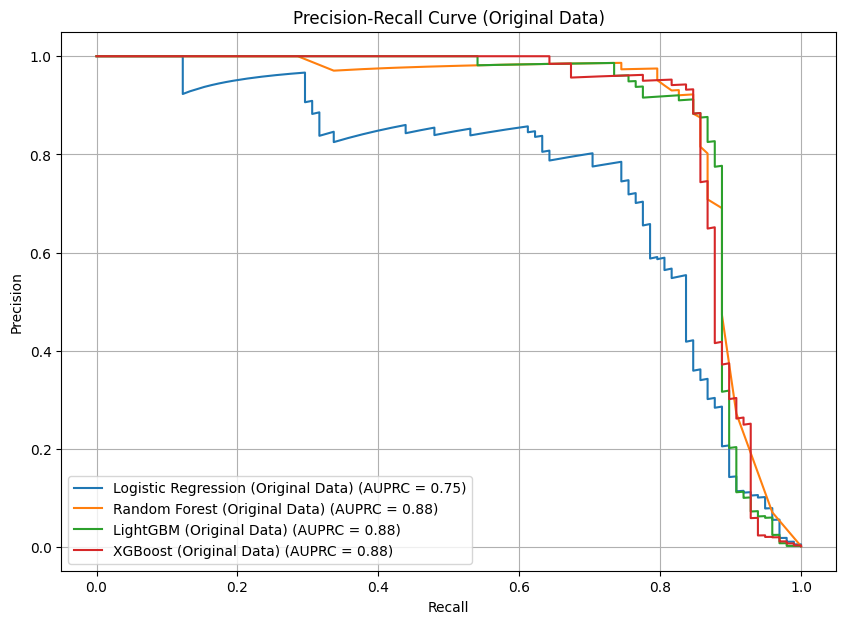

In [45]:
plt.figure(figsize=(10, 7))

# Plot AUPRC for each model trained on original data
plot_auprc(model_orig_lr, X_test_orig, Y_test_orig, 'Logistic Regression (Original Data)')
plot_auprc(rf_model_orig, X_test_orig, Y_test_orig, 'Random Forest (Original Data)')
plot_auprc(lgbm_model_orig, X_test_orig, Y_test_orig, 'LightGBM (Original Data)')
plot_auprc(xgb_model_orig, X_test_orig, Y_test_orig, 'XGBoost (Original Data)')
plt.title('Precision-Recall Curve (Original Data)')

plt.show()

## Detailed Report of Credit Card Fraud Detection Analysis

This report summarizes the steps taken to build and evaluate machine learning models for credit card fraud detection using an imbalanced dataset.

### 1. Introduction

Credit card fraud detection is a critical task in financial institutions. However, datasets in this domain are typically highly imbalanced, with a very small percentage of transactions being fraudulent compared to legitimate ones. This imbalance poses challenges for standard machine learning models and evaluation metrics.

### 2. Data Loading and Initial Exploration

We began by loading the credit card transaction data from the provided CSV file (`creditcard.csv`) into a pandas DataFrame. Initial exploration involved:

-   Viewing the first and last few rows to understand the data structure.
-   Using `df.info()` to check data types and identify any missing values. We confirmed that there were no null values in the dataset.
-   Performing a statistical summary using `df.describe()` to get insights into the distribution of numerical features.
-   Checking the shape of the DataFrame (`df.shape`) to know the number of rows and columns.
-   Analyzing the distribution of the target variable ('Class') using `value_counts()`. This clearly showed the severe imbalance, with a vast majority of transactions being legitimate (Class 0) and a small number being fraudulent (Class 1).

### 3. Handling Data Imbalance

To address the class imbalance, we explored two common techniques:

#### a) Undersampling

-   We separated the dataset into two DataFrames: `legit` (legitimate transactions) and `fraud` (fraudulent transactions).
-   We created a new sample of legitimate transactions (`legit_sample`) with the same number of instances as the fraudulent transactions (492).
-   We concatenated `legit_sample` and `fraud` to create a new, balanced dataset (`new_dataset`).
-   We verified that this new dataset had an equal number of instances for both classes.

#### b) Class Weighting (Training on Original Data)

-   As an alternative approach, we also trained models directly on the original imbalanced dataset.
-   To prevent the models from being biased towards the majority class, we used the `class_weight='balanced'` parameter during model initialization (for Logistic Regression, RandomForestClassifier, and LGBMClassifier). This parameter automatically assigns higher weights to the minority class during training.
-   For XGBoost, which doesn't have a direct `class_weight` parameter, we calculated and used the `scale_pos_weight` parameter, which serves a similar purpose by scaling the gradient for the positive class.

### 4. Model Training

We trained four different classification models:

-   Logistic Regression
-   Random Forest Classifier
-   LightGBM Classifier
-   XGBoost Classifier

We trained these models on both the undersampled dataset (in the initial experiments) and the original dataset with class weights (in the later experiments).

### 5. Model Evaluation

We evaluated the performance of the trained models using several metrics, focusing on those appropriate for imbalanced datasets:

#### a) Accuracy

-   We calculated the accuracy score for each model on both the training and test sets for both the undersampled and original datasets.
-   We observed that models trained on the original, imbalanced dataset showed very high overall accuracy.

#### b) Precision-Recall Curve and AUPRC

-   **Importance of Precision and Recall in Fraud Detection:** In fraud detection, the cost of a false negative (missing a fraudulent transaction) is often much higher than the cost of a false positive (incorrectly flagging a legitimate transaction as fraudulent). Therefore, **Precision** (the ability of the model to correctly identify positive instances among those it flags as positive) and **Recall** (the ability of the model to find all the positive instances) are more informative metrics than accuracy. High precision means when the model predicts fraud, it's usually correct, which is important to avoid inconveniencing legitimate customers. High recall means the model catches most of the actual fraud, which is crucial for minimizing financial losses. The ideal balance between precision and recall depends on the specific business requirements.

-   **Why Accuracy is Misleading:** Accuracy alone can be misleading in imbalanced datasets because a model can achieve high accuracy by simply predicting the majority class for most instances. This doesn't tell us how well the model performs on the rare but important minority class.

-   **Why AUPRC is Suitable:** The Area Under the Precision-Recall Curve (AUPRC) is a robust metric for evaluating models on imbalanced datasets. It summarizes the trade-off between precision and recall across different probability thresholds. A higher AUPRC indicates better performance on the minority class, reflecting a better balance between finding all positive instances and minimizing false alarms.

-   We plotted the Precision-Recall curves and calculated the AUPRC for all models trained on both the undersampled and original datasets.

### 6. Key Observations and Discussion

-   **Accuracy vs. AUPRC:** Our experiments clearly demonstrated that high accuracy on the original imbalanced dataset does not necessarily translate to good performance in identifying fraudulent transactions. Models with high accuracy on the original data had significantly lower AUPRC values compared to some models trained on the undersampled data.
-   **Undersampling vs. Class Weighting:** Training on the undersampled dataset led to models with higher AUPRC values, suggesting they were better at balancing precision and recall for the minority class. Training on the original data with class weights also improved performance on the minority class compared to training without any imbalance handling, but the AUPRC values were generally lower than with undersampling (except for Logistic Regression).
-   **Model Performance:** Among the models tested, LightGBM and XGBoost generally performed well in terms of AUPRC on both the undersampled and original datasets with class weights. Logistic Regression performed reasonably well on the undersampled data but had a significantly lower AUPRC on the original data.

### 7. Conclusion

Analyzing imbalanced datasets like this requires careful consideration of evaluation metrics beyond just accuracy. AUPRC is a valuable metric that provides a more accurate picture of a model's ability to identify the minority class while managing false positives. Both undersampling and using class weights are effective techniques for handling imbalance during training, with our experiments suggesting that undersampling led to models with a better precision-recall trade-off in this specific case.

The choice of the best model and the preferred imbalance handling technique depends on the specific requirements and the acceptable trade-off between precision and recall for the fraud detection system.